In [1]:
#%%capture
!pip install yfinance==0.2.58
#!pip install yfinance
#!pip install twelvedata
import numpy as np
import pandas as pd
import yfinance as yf
!pip show yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.64
    Uninstalling yfinance-0.2.64:
      Successfully uninstalled yfinance-0.2.64
Name: yfinance
Version: 0.2.58
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: /usr/local/lib/python3.11/dist-packages
Requires: beautifulsoup4, curl_cffi, frozendict, multitasking, numpy, pandas, peewee, platformdirs, pytz, requests
Required-by: 


In [19]:
ticker = "1020.SR"
data = yf.download(ticker, start="2022-01-01", end="2025-06-23")
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,1020.SR,1020.SR,1020.SR,1020.SR,1020.SR
Date,,,,,
2022-01-02,12.151901,12.164301,11.978303,11.978303,3966845
2022-01-03,12.300700,12.437099,12.052702,12.089901,14159026
2022-01-04,12.573498,12.585897,12.300700,12.350300,10459059
2022-01-05,12.970294,13.019894,12.598297,12.598297,16400723
2022-01-06,13.007494,13.156293,12.771896,12.858695,8341881
...,...,...,...,...,...
2025-06-16,12.460000,12.640000,12.440000,12.520000,2517533
2025-06-17,12.340000,12.540000,12.320000,12.440000,1711042


In [20]:
# Find the lowest price for the stock over the last week
data["prv_low_1"] = data["Low"].shift(1)
data["prv_low_2"] = data["Low"].shift(2)
data["prv_low_3"] = data["Low"].shift(3)
data["prv_low_4"] = data["Low"].shift(4)
data["prv_low_5"] = data["Low"].shift(5)
data["Low_Last_5d"] = data[["prv_low_1", "prv_low_2","prv_low_3","prv_low_4","prv_low_5"]].values.min(1)
data = data.drop(["prv_low_1", "prv_low_2", "prv_low_3", "prv_low_4", "prv_low_5"], axis=1)

# Find the highest price for the stock over the last week
data['prv_high_1'] = data["High"].shift(1)
data['prv_high_2'] = data["High"].shift(2)
data['prv_high_3'] = data["High"].shift(3)
data['prv_high_4'] = data["High"].shift(4)
data['prv_high_5'] = data["High"].shift(5)
data["High_Last_5d"] = data[["prv_high_1", "prv_high_2","prv_high_3","prv_high_4","prv_high_5"]].values.max(1)
data = data.drop(["prv_high_1", "prv_high_2", "prv_high_3", "prv_high_4", "prv_high_5"], axis=1)
data.tail(2)

Price,Close,High,Low,Open,Volume,Low_Last_5d,High_Last_5d
Ticker,1020.SR,1020.SR,1020.SR,1020.SR,1020.SR,,
Date,,,,,,,
2025-06-19,12.08,12.24,12.06,12.14,2671134,12.0,12.66
2025-06-22,12.08,12.30,12.04,12.12,2349358,12.0,12.64


In [21]:
# Create boolean variable marking whether stock dropped at least six percent in the last week (five days)
data["six_percent_of_close_price"] = .94*data["Close"]
data["Close"] = 1*data["Close"]
data["six_percent_of_close_price_within_last_five_days"] = np.where((data['Low_Last_5d'] <= data['six_percent_of_close_price']) & (data['six_percent_of_close_price'] <= data['High_Last_5d']), True, False)

In [22]:
# Create boolean variable marking whether current close price is greater than yesterdays close price
data["Last_Close"] = data["Close"].shift(1)
data["close_diff"] = data["Close"].values.reshape(data.shape[0]) - data["Last_Close"].values.reshape(data.shape[0])
data["up_from_yesterday"] = np.where((data["close_diff"] > 0), True, False)
data.tail(5)

Price,Close,High,Low,Open,Volume,Low_Last_5d,High_Last_5d,six_percent_of_close_price,six_percent_of_close_price_within_last_five_days,Last_Close,close_diff,up_from_yesterday
Ticker,1020.SR,1020.SR,1020.SR,1020.SR,1020.SR,,,,,,,
Date,,,,,,,,,,,,
2025-06-16,12.46,12.64,12.44,12.52,2517533,12.0,12.96,11.7124,False,12.48,-0.02,False
2025-06-17,12.34,12.54,12.32,12.44,1711042,12.0,12.96,11.5996,False,12.46,-0.12,False
2025-06-18,12.16,12.38,12.14,12.34,2122753,12.0,12.96,11.4304,False,12.34,-0.18,False
2025-06-19,12.08,12.24,12.06,12.14,2671134,12.0,12.66,11.3552,False,12.16,-0.08,False
2025-06-22,12.08,12.30,12.04,12.12,2349358,12.0,12.64,11.3552,False,12.08,0.00,False


In [23]:
# Buy stock if price dropped at least seven percent in last week and current close price is greater than yesterdays close price
data["shortsell"] = data["six_percent_of_close_price_within_last_five_days"] & data["up_from_yesterday"]
data["shortsellcumsum"] = data["shortsell"].cumsum().astype('int64')
data = data.drop(["Last_Close","close_diff","six_percent_of_close_price","up_from_yesterday","six_percent_of_close_price_within_last_five_days","Low_Last_5d","High_Last_5d"], axis=1)

# Add numerical columns of stocks current close price increased and decrease by one percent for final analysis
data["Close_up1%"] = 1.01*data["Close"]
data["Close_down1%"] = .99*data["Close"]
data.tail(10)

Price,Close,High,Low,Open,Volume,shortsell,shortsellcumsum,Close_up1%,Close_down1%
Ticker,1020.SR,1020.SR,1020.SR,1020.SR,1020.SR,,,,
Date,,,,,,,,,
2025-06-03,12.56,12.68,12.46,12.58,1426424,False,71,12.6856,12.4344
2025-06-04,12.78,12.90,12.56,12.56,2420131,False,71,12.9078,12.6522
2025-06-11,12.72,12.96,12.66,12.80,3140378,False,71,12.8472,12.5928
2025-06-12,12.60,12.66,12.54,12.64,3483627,False,71,12.7260,12.4740
2025-06-15,12.48,12.54,12.00,12.00,1764584,False,71,12.6048,12.3552
2025-06-16,12.46,12.64,12.44,12.52,2517533,False,71,12.5846,12.3354
2025-06-17,12.34,12.54,12.32,12.44,1711042,False,71,12.4634,12.2166
2025-06-18,12.16,12.38,12.14,12.34,2122753,False,71,12.2816,12.0384


In [24]:
# view dates where we buy the stock + the two days after
#buyclause = data['buy']==True
#view = data[buyclause.shift(2)|buyclause.shift()|buyclause]
#view

In [25]:
data.loc[(data.shortsell == False), 'Close_up1%'] = np.nan
data.loc[(data.shortsell == False), 'Close_down1%'] = np.nan
data.tail(10)

Price,Close,High,Low,Open,Volume,shortsell,shortsellcumsum,Close_up1%,Close_down1%
Ticker,1020.SR,1020.SR,1020.SR,1020.SR,1020.SR,,,,
Date,,,,,,,,,
2025-06-03,12.56,12.68,12.46,12.58,1426424,False,71,NaN,NaN
2025-06-04,12.78,12.90,12.56,12.56,2420131,False,71,NaN,NaN
2025-06-11,12.72,12.96,12.66,12.80,3140378,False,71,NaN,NaN
2025-06-12,12.60,12.66,12.54,12.64,3483627,False,71,NaN,NaN
2025-06-15,12.48,12.54,12.00,12.00,1764584,False,71,NaN,NaN
2025-06-16,12.46,12.64,12.44,12.52,2517533,False,71,NaN,NaN
2025-06-17,12.34,12.54,12.32,12.44,1711042,False,71,NaN,NaN
2025-06-18,12.16,12.38,12.14,12.34,2122753,False,71,NaN,NaN


In [26]:
data["Close_up1%"] = data["Close_up1%"].ffill()
data["Close_down1%"] = data["Close_down1%"].ffill()
data.tail(10)

Price,Close,High,Low,Open,Volume,shortsell,shortsellcumsum,Close_up1%,Close_down1%
Ticker,1020.SR,1020.SR,1020.SR,1020.SR,1020.SR,,,,
Date,,,,,,,,,
2025-06-03,12.56,12.68,12.46,12.58,1426424,False,71,13.50976,13.24224
2025-06-04,12.78,12.90,12.56,12.56,2420131,False,71,13.50976,13.24224
2025-06-11,12.72,12.96,12.66,12.80,3140378,False,71,13.50976,13.24224
2025-06-12,12.60,12.66,12.54,12.64,3483627,False,71,13.50976,13.24224
2025-06-15,12.48,12.54,12.00,12.00,1764584,False,71,13.50976,13.24224
2025-06-16,12.46,12.64,12.44,12.52,2517533,False,71,13.50976,13.24224
2025-06-17,12.34,12.54,12.32,12.44,1711042,False,71,13.50976,13.24224
2025-06-18,12.16,12.38,12.14,12.34,2122753,False,71,13.50976,13.24224


In [27]:
data["buyup"] = np.where((data["Close"].values.reshape(data.shape[0])-data["Close_up1%"].values.reshape(data.shape[0]) > 0),True,False)
data["buydown"] = np.where((data["Close_down1%"].values.reshape(data.shape[0])-data["Close"].values.reshape(data.shape[0]) > 0),True,False)
data["buy"] = data["buydown"]|data["buyup"]
data["buycumsum"] = data["buy"].cumsum().astype('int64')
#data.to_csv('out.csv', index=False)
#data = pd.read_csv('out.csv')
#data.tail(10)

In [28]:
data.to_csv("out.csv")
data = pd.read_csv("out.csv")
data.head(10)

,Price,Close,High,Low,Open,Volume,shortsell,shortsellcumsum,Close_up1%,Close_down1%,buyup,buydown,buy,buycumsum
0,Ticker,1020.SR,1020.SR,1020.SR,1020.SR,1020.SR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-02,12.151901245117188,12.16430135457321,11.9783034081909,11.9783034081909,3966845,False,0.0,NaN,NaN,False,False,False,0.0
3,2022-01-03,12.300700187683105,12.43709861430449,12.05270170456863,12.089901107490013,14159026,False,0.0,NaN,NaN,False,False,False,0.0
4,2022-01-04,12.573497772216797,12.58589695709104,12.30069999928768,12.350299510378022,10459059,False,0.0,NaN,NaN,False,False,False,0.0
5,2022-01-05,12.970293998718262,13.019893510335482,12.59829719965687,12.59829719965687,16400723,False,0.0,NaN,NaN,False,False,False,0.0
6,2022-01-06,13.00749397277832,13.156292503596994,12.771895606083758,12.858694518095207,8341881,False,0.0,NaN,NaN,False,False,False,0.0
7,2022-01-09,13.453889846801758,13.602689304598997,13.081893050037586,13.081893050037586,10925690,True,1.0,13.588429,13.319351,False,False,False,0.0
8,2022-01-10,13.267891883850098,13.590289168659375,13.24309166631194,13.577889059890298,8922892,False,1.0,13.588429,13.319351,False,True,True,1.0
9,2022-01-11,13.453889846801758,13.503490281977145,13.20589229024713,13.267891910351903,6289943,True,2.0,13.588429,13.319351,False,False,False,1.0


In [29]:
entry_exit_values = []
dates = []
for x in range(1,int(data["shortsellcumsum"].max())+1):
  frame = data.loc[data.shortsellcumsum==x]
  if (frame.loc[frame.buy==True].shape[0]>=1):
    ssclose = float(frame.loc[frame.shortsell==True]["Close"].to_list()[0])
    buyclose = float(frame.loc[frame.buy==True]["Close"].to_list()[0])
    entry_exit_values.append(ssclose-buyclose)
    dates.append(frame.loc[frame.buy==True]["Price"].to_list()[0])

In [30]:
entry_exit_values

[0.18599796295166016,
 0.18599891662597656,
 0.18599891662597656,
 0.2851982116699219,
 0.5346202850341797,
 0.2830352783203125,
 0.2830333709716797,
 0.3459320068359375,
 0.2515869140625,
 0.2201404571533203,
 0.8553924560546875,
 0.2515869140625,
 0.314483642578125,
 -0.3459300994873047,
 0.16639995574951172,
 0.21759986877441406,
 0.30720043182373047,
 0.15359973907470703,
 0.33279991149902344,
 0.11520004272460938,
 0.21760082244873047,
 0.14080047607421875,
 0.15360069274902344,
 0.15999984741210938,
 0.20800018310546875,
 0.14400005340576172,
 0.1920003890991211,
 0.28800010681152344,
 -0.14400005340576172,
 -0.1920003890991211,
 0.3359994888305664,
 -0.28799915313720703]

In [31]:
def cumlative_pnl(entry_exit_values):
  cumpnl = 0
  pnl = []
  for num in entry_exit_values:
    cumpnl += num
    pnl.append(cumpnl)
  return pnl
import datetime as dt
from datetime import datetime

pnl = cumlative_pnl(entry_exit_values=entry_exit_values)
#pnl = [diff*115 for diff in pnl]

date_objects = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in dates]

In [32]:
print(date_objects)
print(pnl)

[datetime.date(2022, 1, 10), datetime.date(2022, 1, 18), datetime.date(2022, 2, 3), datetime.date(2022, 2, 13), datetime.date(2022, 2, 24), datetime.date(2022, 3, 21), datetime.date(2022, 3, 29), datetime.date(2022, 4, 21), datetime.date(2022, 5, 8), datetime.date(2022, 6, 1), datetime.date(2022, 6, 22), datetime.date(2022, 7, 14), datetime.date(2022, 7, 25), datetime.date(2022, 7, 27), datetime.date(2022, 8, 21), datetime.date(2022, 10, 9), datetime.date(2023, 3, 8), datetime.date(2023, 4, 5), datetime.date(2023, 6, 19), datetime.date(2023, 11, 7), datetime.date(2023, 11, 9), datetime.date(2024, 1, 3), datetime.date(2024, 4, 18), datetime.date(2024, 6, 4), datetime.date(2024, 6, 12), datetime.date(2024, 6, 25), datetime.date(2024, 8, 4), datetime.date(2024, 11, 12), datetime.date(2024, 12, 16), datetime.date(2025, 1, 1), datetime.date(2025, 4, 9), datetime.date(2025, 4, 21)]
[0.18599796295166016, 0.3719968795776367, 0.5579957962036133, 0.8431940078735352, 1.3778142929077148, 1.6608495

Text(0, 0.5, 'Cumulative PNL ($)')

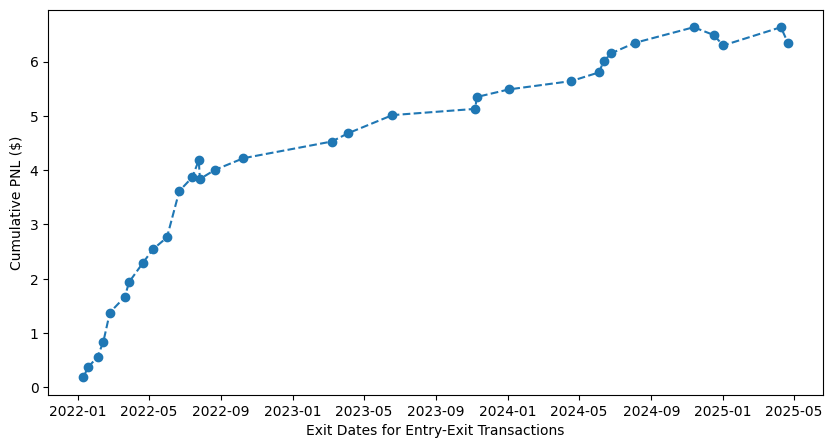

In [33]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(date_objects, pnl,marker='o', linestyle='dashed')
plt.xlabel('Exit Dates for Entry-Exit Transactions')
plt.ylabel('Cumulative PNL ($)')